Зчитайте дані з таблиці "Середньорічна щомісячна зарплата в Україні за 1992—2022 роки" з Вікіпедії за посиланням  та виконайте наступні завдання:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
data = pd.read_html(url, header=0)[2]

1.	Виведіть перші 5 рядків таблиці.

In [2]:
fr = data.head(5)

print(fr)

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


2.	Визначте кількість рядків і стовпчиків за допомогою атрибуту shape

In [3]:
num_rows, num_columns = data.shape

print(f"Кількість рядків: {num_rows}, Кількість стовпчиків: {num_columns}")

Кількість рядків: 32, Кількість стовпчиків: 5


3.	Визначте загальну кількість років та кількість місяців у даних.

In [4]:
num_years = len(data['Рік']) - 1
num_months = num_years*12

print("Загальна кількість років: ", num_years)
print("Загальна кількість місяців: ", num_months)

Загальна кількість років:  31
Загальна кількість місяців:  372


4.	Замінити пропущені значення  «-» в таблиці на NaN

In [5]:
data = data.rename(columns={
    "Рік": "Year",
    "В національній валюті": "Salary in UAH",
    "В доларах США": "Salary in USD",
    "Кількість кг хліба[20] на середню зарплату": "Bread per Salary",
    "Кількість БігМаків на середню зарплату": "BigMacs per Salary"
})

data = data.replace("—", np.nan)

data

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88▲","28,04▼","1015,67▲",NaN
1,1993,163533▲,"36,03▲","430,42▼",NaN
2,1994,1426343▲,"44,99▲","372,76▼",NaN
3,1995,7304000▲,"49,53▲","201,76▼",NaN
4,1996,"125,23▼","68,45▲","198,62▼",NaN
5,1997,"143,09▲","76,86▲","211,13▲",20[21]
6,1998,"152,83▲","62,39▼","177,69▼",н.д.
7,1999,"177,39▲","42,95▼","180,68▲",24▲[22]
8,2000,"231,04▲","42,47▼","117,51▼",н.д.
9,2001,"311,62▲","58,01▲","153,57▲",50▲[23]


5.	Визначити тип стовпців за допомогою dtypes.

In [6]:
column_types = data.dtypes

print("Типи стовпців:")
print(column_types)

Типи стовпців:
Year                  object
Salary in UAH         object
Salary in USD         object
Bread per Salary      object
BigMacs per Salary    object
dtype: object


6.	Видаліть передостанній і останній стовпчики ( Кількість кгхліба[20] на середнюзарплату,  Кільксть БігМаків на середню зарплату). Далі працюйте з оновленою таблицею.

In [7]:
data = data.drop(columns=["Bread per Salary", "BigMacs per Salary"])

data

,Year,Salary in UAH,Salary in USD
0,1992,"5832,88▲","28,04▼"
1,1993,163533▲,"36,03▲"
2,1994,1426343▲,"44,99▲"
3,1995,7304000▲,"49,53▲"
4,1996,"125,23▼","68,45▲"
5,1997,"143,09▲","76,86▲"
6,1998,"152,83▲","62,39▼"
7,1999,"177,39▲","42,95▼"
8,2000,"231,04▲","42,47▼"
9,2001,"311,62▲","58,01▲"


7.	Замінити тип нечислових даних на числові.

In [8]:
data['Salary in UAH'] = data['Salary in UAH'].str.replace('▲', '').str.replace('▼', '')
data['Salary in USD'] = data['Salary in USD'].str.replace('▲', '').str.replace('▼', '')

data['Year'] = data['Year'].str.replace("*", "").astype(int)
data['Salary in UAH'] = data['Salary in UAH'].str.replace(',', '.').astype(float)
data['Salary in USD'] = data['Salary in USD'].str.replace(',', '.').astype(float)

data.dtypes

<ipython-input-8-79bca549a911>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Year'] = data['Year'].str.replace("*", "").astype(int)


Year               int64
Salary in UAH    float64
Salary in USD    float64
dtype: object

8.	Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len)

In [9]:
total_rows = len(data)
missing_counts = data.isnull().sum()
missing_ratios = missing_counts / total_rows

print(missing_ratios)

Year             0.0
Salary in UAH    0.0
Salary in USD    0.0
dtype: float64


9.	Замініть всі пропущені значення на середні значення по (стовпцю).

In [10]:
data_filled = data.fillna(data.mean())

data

,Year,Salary in UAH,Salary in USD
0,1992,5832.88,28.04
1,1993,163533.00,36.03
2,1994,1426343.00,44.99
3,1995,7304000.00,49.53
4,1996,125.23,68.45
5,1997,143.09,76.86
6,1998,152.83,62.39
7,1999,177.39,42.95
8,2000,231.04,42.47
9,2001,311.62,58.01


10.	Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.

In [16]:
year_biggest_salary_UAH = data.loc[data['Salary in UAH'].idxmax()]['Year']

print("Рік з найвищою зарплатою в грн:", int(year_biggest_salary_UAH))

Рік з найвищою зарплатою в грн: 1995


11.	Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату.

In [17]:
year_min_salary_usd = data.loc[data['Salary in USD'].idxmin()]['Year']

print("Рік з мінімальною зарплатою в доларах:", int(year_min_salary_usd))

Рік з мінімальною зарплатою в доларах: 1992


12.	Виведіть роки, коли зарплата в грн була вище середньої.

In [20]:
asalary_UAH = data['Salary in UAH'].mean()
years_above_avg_salary = data[data['Salary in UAH'] > asalary_UAH]['Year']

print("Роки з зарплатою вище середньої в грн: ", years_above_avg_salary)

Роки з зарплатою вище середньої в грн:  2    1994
3    1995
Name: Year, dtype: int64


13.	Порівняйте  зарплату  в грн за останні два доступних роки.

In [21]:
last_two_years_UAH = data[data['Year'].isin(data.nlargest(2, 'Year')['Year'])][['Year', 'Salary in UAH']]
print("Зарплата в останніх роках: ", last_two_years_UAH)

if last_two_years_UAH.iloc[0]['Salary in UAH'] > last_two_years_UAH.iloc[1]['Salary in UAH']:
    print("Зарплата в грн. більша в ", int(last_two_years_UAH.iloc[0]['Year']), " році")
elif last_two_years_UAH.iloc[0]['Salary in UAH'] < last_two_years_UAH.iloc[1]['Salary in UAH']:
    print("Зарплата в грн. більша в ", int(last_two_years_UAH.iloc[1]['Year']), " році")
else:
    print("Зарплата за останні два роки однакова.")

Зарплата в останніх роках:      Year  Salary in UAH
30  2022       13376.21
31  2023       12954.12
Зарплата в грн. більша в  2022  році


14.	Створіть графік, що відображає  зарплату в Україні з часом (за роками).

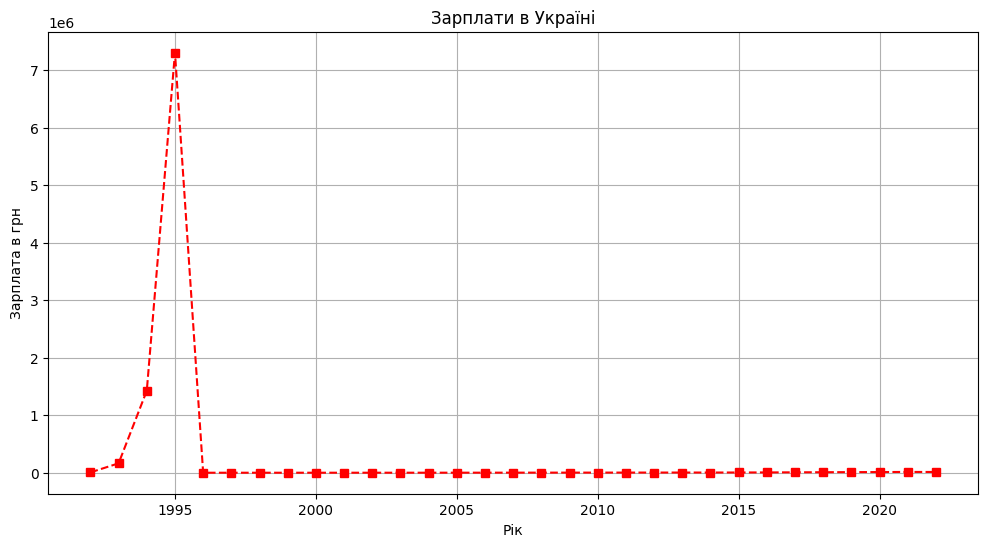

In [27]:
years = data['Year']
salaries_UAH = data['Salary in UAH']

plt.figure(figsize=(12, 6))
plt.plot(years, salaries_UAH, marker='s', linestyle='--', color='r')
plt.title('Зарплати в Україні')
plt.xlabel('Рік')
plt.ylabel('Зарплата в грн')
plt.grid(True)
plt.show()

15.	Видаліть останній рік з таблиці та виведіть оновлену таблицю.

In [24]:
data = data.drop(data.index[-1])

data

,Year,Salary in UAH,Salary in USD
0,1992,5832.88,28.04
1,1993,163533.00,36.03
2,1994,1426343.00,44.99
3,1995,7304000.00,49.53
4,1996,125.23,68.45
5,1997,143.09,76.86
6,1998,152.83,62.39
7,1999,177.39,42.95
8,2000,231.04,42.47
9,2001,311.62,58.01


16.	Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.

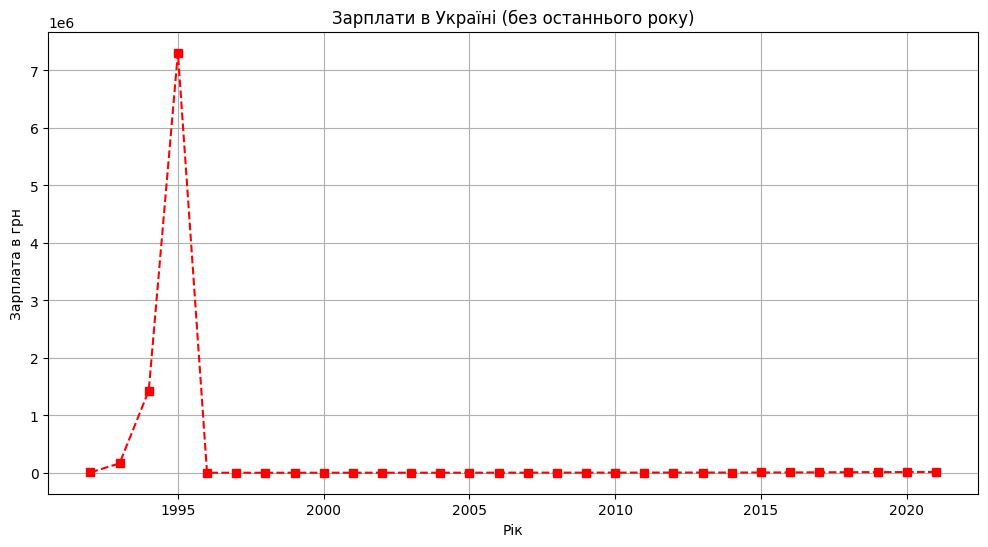

In [31]:


years = data['Year'][:-1]
salaries_UAH = data['Salary in UAH'][:-1]

plt.figure(figsize=(12, 6))
plt.plot(years, salaries_UAH, marker='s', linestyle='--', color='r')
plt.title('Зарплати в Україні (без останнього року)')
plt.xlabel('Рік')
plt.ylabel('Зарплата в грн')
plt.grid(True)
plt.show()


17.	Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку.

In [33]:
last_five_years = data.tail(5)

last_two_years = data.tail(2)

salary_fives = last_five_years['Salary in UAH'].sum()

salary_twos = last_two_years['Salary in UAH'].sum()

if salary_twos > salary_fives:
    result = "Зарплата за останні два роки > за зарплату за останні 5 років."
elif salary_twos < salary_fives:
    result = "Зарплата за останні два роки < за зарплату за останні 5 років."
else:
    result = "Зарплата за останні два роки = зарплаті за останні 5 років."

print(result)

Зарплата за останні два роки < за зарплату за останні 5 років.


Висновок: У цій роботі ми виконали аналіз даних щодо середньорічної щомісячної зарплати в Україні за період з 1992 по 2022 роки. Основні кроки та результати описані в роботі. Використовували в ході роботи pandas, numpy.